# Who feeds the world ? And how wealthy are they ?

## Abstract <a name="abstract"></a>

Our main goal in this project is to find social and economic world-wide relations of countries based on the state of their agricultural sector, using indicators such as imports, exports, production, self-sufficiency, etc. In order to find such indicators, we would like to use the data from the "Global Food & Agriculture Statistics" datasets. First, we would like to produce a map showing which countries "feed the world" i.e. which countries are net-exporting food. That map would contain a slider to show how this evolved over the past fifty years. Then we would like to show countrywise the level of food self-sufficiency i.e. the way a country does not need to trade with other ones in order to feed its population. We will also compare it to nations' economic development and see if some correlations can be found. We will visualize our best findings with several interactive maps and plots.

## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- How does the production and consumption of food look like from a geographical point of view ? Which countries are net food exporters or importers? How did this evolve over the last few decades ?
- What's the level of self-sufficiency in food production of individual countries and how does this change over time ?
- Is there a link between the GDP per capita and the agricultural trade balance ? Are countries that are net exporters or importers richer ? Are self-sufficient countries richer ?
- If we find any relations, are they also still valid if we check for specific crops ? Are there some crops that are mostly produced by richer countries, some that are mostly produced by poorer countries?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Prices of food](#2B)  
                
    3. [Structure of international trade](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    1. [Food self-sufficiency](#3B)

    2. [Giving countries an economic score based on their agricultural features](#3C)

    3. [Food prices stability and agricultural features](#3C)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display

**Auxiliary function imports:**

We have implemented some functions into a dedicated module (file `Milestone_2_scripts.py`) in order to simplify the code and make this notebook more enjoyable to read.

In [2]:
from Milestone_2_scripts import *

**Setup:**

In [3]:
data_folder_path = "./Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Crops trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Population" : "Population_E_All_Data_(Norm).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            2. [Extracting ... from the "Livestock production" dataset](#1Daiii)
            
            2. [Extracting ... from the "Live animals trade" dataset](#1Daiv)
            
            5. [Removing areas which are not countries](#1Dav)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)
        
        3. [Correcting inconsistent data entries](#1Dc)
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset would be a subset of the "Global Food & Agriculture Statistics" that is found in the proposed datasets list. In this dataset, we have seen that we could work with the production as well as import and export quantities per year and per country. We will add information about countries GDP to this database.

### 1.B. Loading the data set  <a name="1B"></a>

In [4]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We load each interresting dataset in the dictionary `df` :

In [5]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to get a first sense of the data.

In [6]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [7]:
display_df(df, interesting_datasets)

'Crops production'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
359757,41,"China, mainland",449,Mushrooms and truffles,5419,Yield,1973,1973,hg/ha,1345455.0,Fc
540971,58,Ecuador,619,"Fruit, fresh nes",5312,Area harvested,2006,2006,ha,20000.0,F
106274,12,Bahamas,490,Oranges,5312,Area harvested,1970,1970,ha,NaN,M
1453896,190,Saint Pierre and Miquelon,544,Strawberries,5312,Area harvested,1991,1991,ha,NaN,M
1806976,228,USSR,1720,"Roots and Tubers,Total",5510,Production,1964,1964,tonnes,93642000.0,A


'Crops trade'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2938074,49,Cuba,2077,Total Meat,5910,Export Quantity,1994,1994,tonnes,0.0,A
13532348,5403,Southern Europe,1232,Food prep nes,5910,Export Quantity,1961,1961,tonnes,7537.0,A
5072002,102,Iran (Islamic Republic of),1037,"Fat, pigs",5922,Export Value,1979,1979,1000 US$,NaN,M
464315,10,Australia,237,"Oil, soybean",5610,Import Quantity,1972,1972,tonnes,1029.0,NaN
12551562,5204,Central America,1080,"Meat, turkey",5910,Export Quantity,2012,2012,tonnes,0.0,A


'Population'

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
171326,5102,Middle Africa,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1961,1961,1000,32933.952,XU
75147,104,Ireland,3010,Population - Est. & Proj.,551,Rural population,2074,2074,1000,0.000,XUru
70309,97,Hungary,3010,Population - Est. & Proj.,512,Total Population - Male,2068,2068,1000,3670.221,XU
151331,219,Tonga,3010,Population - Est. & Proj.,512,Total Population - Male,1990,1990,1000,48.247,XU
3405,5,American Samoa,3010,Population - Est. & Proj.,513,Total Population - Female,2033,2033,1000,0.000,XU


'Macroeconomy'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
19027,9,Argentina,22016,"Value Added (Agriculture, Forestry and Fishing)",6129,Annual growth US$,1976,1976,%,29.896960,Fc
135880,116,Democratic People's Republic of Korea,22078,Value Added (Manufacture of tobacco products),6109,Value Local Currency,1971,1971,millions,NaN,NaN
361975,166,Panama,22016,"Value Added (Agriculture, Forestry and Fishing)",6108,"Value US$, 2005 prices",1991,1991,millions,585.234011,XAM
353578,221,Oman,22008,Gross Domestic Product,6156,"Annual growth Local Currency, 2005 prices",1973,1973,%,-13.991477,Fc
439368,277,South Sudan,22016,"Value Added (Agriculture, Forestry and Fishing)",6103,Share of GDP in US$,2009,2009,%,5.053770,Fc


'Livestock production'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
68828,125,Liechtenstein,976,Sheep,5111,Stocks,1998,1998,Head,3608.0,NaN
88101,165,Pakistan,1746,Cattle and Buffaloes,5111,Stocks,1996,1996,Head,40697000.0,A
50173,89,Guatemala,1107,Asses,5111,Stocks,1965,1965,Head,6000.0,*
100917,244,Samoa,1746,Cattle and Buffaloes,5111,Stocks,2000,2000,Head,28000.0,A
26600,214,"China, Taiwan Province of",1034,Pigs,5111,Stocks,1981,1981,Head,4820201.0,NaN


'Live animals trade'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
284681,132,Maldives,1057,Chickens,5622,Import Value,2005,2005,1000 US$,6.0,NaN
296576,137,Mauritius,1982,Food Excl Fish,5922,Export Value,1975,1975,1000 US$,255104.0,A
470488,223,Turkey,1016,Goats,5622,Import Value,1992,1992,1000 US$,0.0,NaN
59290,20,Botswana,1884,Live Animals,5622,Import Value,1998,1998,1000 US$,4932.0,A
166851,66,Fiji,1171,Animals live nes,5922,Export Value,2007,2007,1000 US$,0.0,F


At first glance, our datasets seem very clean.

Each of our dataset contains a column "Year" and a column that is either named "Area" or "Country". This is a great news for us since we want to do a both geographical and time-related analysis.

The columns "Area" and "Country" both correspond to the country except that the "Area" may contains a group of country (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will clean the datasets. The final goal is to produce one uniformized and normalized dataset on which we could work (see [1.F](#1F)).

Such a cleaned dataset may look like this  (in a very simplistic way):

    Country | Year | GDP | Crops production | Livestock production

#### 1.D.a. Removing unusefull data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes without the unusefull data.

In [8]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>

In [9]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [10]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

In [11]:
display(df_useful["GDP"].sample(5))

,Area Code,Area,Year,Value
51662,17,Bermuda,1995,2556.766532
490277,226,Uganda,1998,7490.865855
560127,5502,Melanesia,2014,38828.421670
132376,51,Czechoslovakia,1975,27299.650890
475504,220,Trinidad and Tobago,1975,2442.624147


##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>

In [12]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [13]:
df_useful['Crops Area harvested'] = food_crop_area_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Unit", "Flag"])
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Unit", "Flag"])
df_useful['Crops Seed'] = food_crop_seed_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Unit", "Flag"])
df_useful['Crops Yield'] =  food_crop_yield_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Unit", "Flag"])

In [14]:
display(df_useful['Crops Area harvested'].sample(5))
display(df_useful['Crops Production'].sample(5))
display(df_useful['Crops Seed'].sample(5))
display(df_useful['Crops Yield'].sample(5))

,Area Code,Area,Item,Year,Value
474502,167,Czechia,Maize,2008,113777.0
1982814,5103,Northern Africa,Avocados,1983,125.0
769000,95,Honduras,"Mangoes, mangosteens, guavas",2003,3234.0
404552,45,Comoros,Cereals (Rice Milled Eqv),1987,14236.0
1215746,157,Nicaragua,Oranges,1975,10000.0


,Area Code,Area,Item,Year,Value
897762,109,Jamaica,Potatoes,1979,11331.0
1577369,206,Sudan (former),"Fruit, tropical fresh nes",1981,NaN
1104021,138,Mexico,"Maize, green",1962,NaN
444611,98,Croatia,Figs,1994,5377.0
34184,5,American Samoa,"Maize, green",1963,4.0


,Area Code,Area,Item,Year,Value
208268,21,Brazil,Rapeseed,1979,15.0
751947,91,Guyana,Soybeans,1992,0.0
316266,40,Chile,"Peas, dry",2010,180.0
897291,109,Jamaica,Pigeon peas,1994,90.0
1400549,146,Republic of Moldova,Maize,2004,10000.0


,Area Code,Area,Item,Year,Value
2539531,5803,Small Island Developing States,"Roots and Tubers,Total",1964,57077.0
1996943,5103,Northern Africa,Soybeans,2001,25091.0
1384864,179,Qatar,"Roots and Tubers,Total",1977,92500.0
2318379,5401,Eastern Europe,Soybeans,1968,6371.0
423829,48,Costa Rica,Maize,1961,10239.0


##### 1.D.a.iii. Extracting ... from the "Livestock production" dataset<a name="1Daiii"></a>

In [15]:
df_useful['Livestock production'] = df['Livestock production']

##### 1.D.a.iv. Extracting ... from the "Live animals trade" dataset<a name="1Daiv"></a>

In [16]:
df_useful['Live animals trade'] = df['Live animals trade']

##### 1.D.a.v. Removing areas which are not countries <a name="1Dav"></a>

Having a more detailled look at the dataset, we have remarked that the areas which are real countries are exactely the ones with an "Area Code" below 5000.

In [17]:
#remove Area code >= 5000
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        display(df_useful[df_name].sample(5))
        selection_countries = df_useful[df_name]['Area Code']<5000
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


,Area Code,Area,Year,Value
472987,219,Tonga,1972,2.325804e+01
497334,229,United Kingdom,1997,1.537000e+06
417997,196,Seychelles,2002,8.379207e+02
84057,32,Cameroon,1985,8.435864e+03
61286,20,Botswana,1996,4.847758e+03


,Area Code,Area,Year,Value
172061,68,France,1986,774574.005220
461900,208,Tajikistan,1979,NaN
499931,215,United Republic of Tanzania,2002,14140.007894
134068,116,Democratic People's Republic of Korea,1987,14391.200030
507664,228,USSR,1998,NaN


Removing areas which are not countries in Crops Area harvested


,Area Code,Area,Item,Year,Value
519601,55,Dominica,"Coffee, green",1989,420.0
2393472,5500,Oceania,Raspberries,1992,371.0
2350794,5403,Southern Europe,Pineapples,2001,146.0
612175,67,Finland,"Peas, dry",2000,5200.0
1332796,171,Philippines,"Cashew nuts, with shell",1986,11320.0


,Area Code,Area,Item,Year,Value
341254,351,China,Taro (cocoyam),2009,92697.0
1668023,217,Togo,Millet,1974,139000.0
1836083,237,Viet Nam,Sweet potatoes,1991,356100.0
1859311,248,Yugoslav SFR,Vetches,1987,9598.0
1871950,181,Zimbabwe,"Fruit, fresh nes",1962,200.0


Removing areas which are not countries in Crops Production


,Area Code,Area,Item,Year,Value
2268442,5305,Western Asia,"Onions, dry",1986,1785684.0
666571,79,Germany,Plums and sloes,1971,570618.0
2204767,5302,Eastern Asia,"Roots and tubers, nes",1971,104195.0
950768,114,Kenya,"Citrus Fruit,Total",1993,204799.0
673367,81,Ghana,"Chillies and peppers, green",1971,94500.0


,Area Code,Area,Item,Year,Value
705520,86,Grenada,Cereals (Rice Milled Eqv),1990,258.0
472210,50,Cyprus,"Vegetables&Melons, Total",1971,128766.0
121527,16,Bangladesh,"Pumpkins, squash and gourds",2012,347000.0
612833,67,Finland,"Pumpkins, squash and gourds",1990,NaN
231850,27,Bulgaria,Raspberries,2006,5766.0


Removing areas which are not countries in Crops Seed


,Area Code,Area,Item,Year,Value
1060620,133,Mali,"Groundnuts, with shell",2014,26000.0
491801,116,Democratic People's Republic of Korea,Cereals (Rice Milled Eqv),1991,116715.0
1794894,234,Uruguay,Sweet potatoes,1977,4050.0
1712428,223,Turkey,"Peas, dry",2004,140.0
2224844,5303,Southern Asia,"Onions, dry",1961,13000.0


,Area Code,Area,Item,Year,Value
1188650,150,Netherlands,Maize,1980,5000.0
1216682,157,Nicaragua,"Rice, paddy",2000,9996.0
1266926,221,Oman,Wheat,1985,26.0
1035675,130,Malawi,"Groundnuts, with shell",1976,20000.0
1035873,130,Malawi,Lentils,1987,0.0


Removing areas which are not countries in Crops Yield


,Area Code,Area,Item,Year,Value
1314587,170,Peru,Carrots and turnips,1977,150771.0
892811,109,Jamaica,Carrots and turnips,2000,141662.0
626010,68,France,Plums and sloes,1965,82107.0
958143,118,Kuwait,"Pumpkins, squash and gourds",1997,196374.0
2432960,5503,Micronesia,"Rice, paddy",1975,9750.0


,Area Code,Area,Item,Year,Value
1310427,169,Paraguay,"Citrus Fruit,Total",2000,169468.0
1285241,166,Panama,"Beans, dry",2009,3787.0
1669216,217,Togo,"Rice, paddy",2003,21700.0
363245,41,"China, mainland","Pumpkins, squash and gourds",2002,185185.0
759906,93,Haiti,Pineapples,1997,98325.0


Removing areas which are not countries in Livestock production


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
30836,49,Cuba,1096,Horses,5111,Stocks,1995,1995,Head,582900.0,NaN
2439,5,American Samoa,1057,Chickens,5112,Stocks,1970,1970,1000 Head,42.0,NaN
100044,190,Saint Pierre and Miquelon,1749,Sheep and Goats,5111,Stocks,1991,1991,Head,45.0,A
77109,142,Montserrat,1749,Sheep and Goats,5111,Stocks,1999,1999,Head,11700.0,A
12332,18,Bhutan,1096,Horses,5111,Stocks,1983,1983,Head,16000.0,*


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
108128,38,Sri Lanka,866,Cattle,5111,Stocks,1993,1993,Head,1704100.0,NaN
7733,13,Bahrain,1016,Goats,5111,Stocks,2012,2012,Head,18500.0,F
78235,144,Mozambique,1016,Goats,5111,Stocks,1991,1991,Head,2500000.0,F
46829,81,Ghana,2029,Poultry Birds,5112,Stocks,1976,1976,1000 Head,10420.0,A
62376,112,Jordan,866,Cattle,5111,Stocks,1961,1961,Head,44900.0,NaN


Removing areas which are not countries in Live animals trade


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
377502,117,Republic of Korea,1110,Mules,5608,Import Quantity,1970,1970,Head,NaN,M
290511,134,Malta,1110,Mules,5908,Export Quantity,2005,2005,Head,NaN,M
231082,104,Ireland,1096,Horses,5622,Import Value,2002,2002,1000 US$,152206.0,NaN
284220,131,Malaysia,1922,Sheep and Goats,5908,Export Quantity,1968,1968,Head,1371.0,A
559263,5200,Americas,1922,Sheep and Goats,5622,Import Value,2008,2008,1000 US$,15147.0,A


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
382574,183,Romania,1110,Mules,5622,Import Value,1985,1985,1000 US$,NaN,M
213072,97,Hungary,946,Buffaloes,5922,Export Value,2012,2012,1000 US$,172.0,NaN
124200,107,Côte d'Ivoire,1057,Chickens,5609,Import Quantity,1983,1983,1000 Head,1900.0,NaN
112641,214,"China, Taiwan Province of",1922,Sheep and Goats,5908,Export Quantity,1978,1978,Head,0.0,A
198130,89,Guatemala,1107,Asses,5922,Export Value,1963,1963,1000 US$,NaN,M


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will create dataframes in `df_usefull_nomissing` which correspond to previous dataframes without the missing data. We first display what we have done in the previous section:

In [18]:
display_df(df_useful, df_useful.keys())

'GDP'

,Area Code,Area,Year,Value
330579,150,Netherlands,2004,650560.925790
478086,222,Tunisia,1998,21802.978475
436304,202,South Africa,1999,138754.525740
138746,54,Denmark,2001,164791.069850
526023,251,Zambia,2014,27134.904865


'Crops Area harvested'

,Area Code,Area,Item,Year,Value
76714,10,Australia,Mustard seed,1982,332.0
809086,100,India,Jute & Jute-like Fibres,1978,1391000.0
590958,238,Ethiopia,Rapeseed,2009,21247.0
1416863,183,Romania,Garlic,1992,10600.0
226447,27,Bulgaria,"Groundnuts, with shell",1966,1251.0


'Crops Production'

,Area Code,Area,Item,Year,Value
1456486,191,Saint Vincent and the Grenadines,Lemons and limes,1978,750.0
1082420,136,Mauritania,"Cow peas, dry",1976,7650.0
90148,11,Austria,"Leeks, other alliaceous vegetables",2012,6300.0
960983,113,Kyrgyzstan,Apples,2007,122000.0
1252794,299,Occupied Palestinian Territory,"Broad beans, horse beans, dry",1976,NaN


'Crops Seed'

,Area Code,Area,Item,Year,Value
126828,16,Bangladesh,"Roots and Tubers,Total",1989,116582.0
940384,114,Kenya,"Cow peas, dry",1981,0.0
853007,104,Ireland,Barley,1985,43000.0
1593633,209,Swaziland,"Groundnuts, with shell",2008,458.0
1662260,176,Timor-Leste,Soybeans,1983,56.0


'Crops Yield'

,Area Code,Area,Item,Year,Value
20403,4,Algeria,Apples,1984,49810.0
632936,68,France,"Vegetables&Melons, Total",1972,123090.0
888549,106,Italy,Vetches,1977,8974.0
1294527,168,Papua New Guinea,"Coffee, green",1961,5040.0
502496,250,Democratic Republic of the Congo,Sweet potatoes,1969,50000.0


'Livestock production'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
29476,48,Costa Rica,1034,Pigs,5111,Stocks,1985,1985,Head,220000.0,*
13476,19,Bolivia (Plurinational State of),1746,Cattle and Buffaloes,5111,Stocks,2009,2009,Head,7985230.0,A
82609,153,New Caledonia,1749,Sheep and Goats,5111,Stocks,2006,2006,Head,10400.0,A
99390,189,Saint Lucia,1096,Horses,5111,Stocks,2004,2004,Head,1000.0,F
10414,23,Belize,1068,Ducks,5112,Stocks,1993,1993,1000 Head,10.0,F


'Live animals trade'

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
474221,226,Uganda,1181,Beehives,5907,Export Quantity,1981,1981,No,NaN,M
83317,32,Cameroon,1982,Food Excl Fish,5922,Export Value,1963,1963,1000 US$,58401.0,A
198190,89,Guatemala,1181,Beehives,5607,Import Quantity,1970,1970,No,NaN,M
309539,28,Myanmar,1096,Horses,5622,Import Value,2009,2009,1000 US$,0.0,F
418183,198,Slovenia,1982,Food Excl Fish,5922,Export Value,2000,2000,1000 US$,218424.0,A


In [19]:
df_useful_nomissing = {}

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

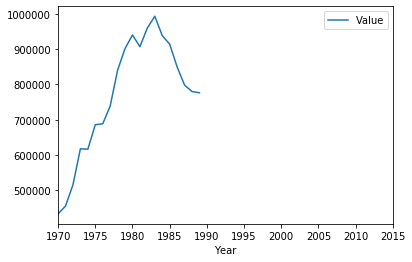

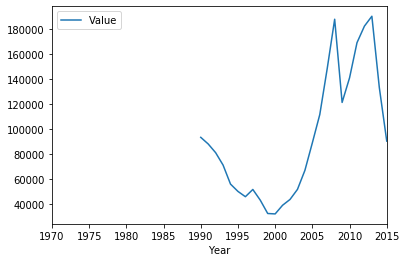

In [20]:
df_useful["GDP"][df_useful["GDP"]['Area']=='USSR'].plot(x ='Year', y='Value', kind = 'line')
df_useful["GDP"][df_useful["GDP"]['Area']=='Ukraine'].plot(x ='Year', y='Value', kind = 'line')

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 

TODO (for countries which has appeared, give them value for previous year)
(for example in 1990 : Ukraine is X% of GPD of all countries that appeared from USSR so for 1970->1989 we give Ukraine value X%*GDP(USSR))

In [42]:
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    print (country, df_useful["GDP"][selection].shape[0])

Afghanistan 46
Albania 46
Algeria 46
Andorra 46
Angola 46
Anguilla 46
Antigua and Barbuda 46
Argentina 46
Armenia 46
Aruba 46
Australia 46
Austria 46
Azerbaijan 46
Bahamas 46
Bahrain 46
Bangladesh 46
Barbados 46
Belarus 46
Belgium 46
Belize 46
Benin 46
Bermuda 46
Bhutan 46
Bolivia (Plurinational State of) 46
Bosnia and Herzegovina 46
Botswana 46
Brazil 46
British Virgin Islands 46
Brunei Darussalam 46
Bulgaria 46
Burkina Faso 46
Burundi 46
Cabo Verde 46
Cambodia 46
Cameroon 46
Canada 46
Cayman Islands 46
Central African Republic 46
Chad 46
Chile 46
China, Hong Kong SAR 46
China, Macao SAR 46
China, mainland 46
Colombia 46
Comoros 46
Congo 46
Cook Islands 46
Costa Rica 46
Côte d'Ivoire 46
Croatia 46
Cuba 46
Curaçao 46
Cyprus 46
Czechia 46
Czechoslovakia 46
Democratic People's Republic of Korea 46
Democratic Republic of the Congo 46
Denmark 46
Djibouti 46
Dominica 46
Dominican Republic 46
Ecuador 46
Egypt 46
El Salvador 46
Equatorial Guinea 46
Eritrea 46
Estonia 46
Ethiopia 46
Ethiopia P

#### 1.D.c. Correcting inconsistent data entries  <a name="1Dc"></a>

In this section, we will create dataframes in `df_cleansed` which correspond to previous dataframes where the inconsistent data entries have been corrected.

In [21]:
df_cleansed = df_useful

### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with country names and normalizing the features.

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>

TODO, explain why (folium) + either Martin or Julien way to do it + show one map

In [22]:
def get_country_id(string_or,countries):
    
    countries.Name=countries.Name.apply(lambda x:x.lower())
    string=string_or.lower()
    
    if string in countries.Name:
        temp=countries.loc[countries.Name==string,'ID'].tolist
        return temp
    
    strs=string.split('-')
    if len(strs)>1:
        string= ' '.join(strs)

    if string=="côte d'ivoire":
        return ['CIV']
    if string=="united states of america":
        return ['USA']
    if string=="vietnam" or string=="viet nam":
        return ["VNM"]
    if string=="south africa":
        return ['ZAF']
    if string=='north korea' or string=="democratic people's republic of korea":
        return["PRK"]
    if string=="russian federation":
        return ["RUS"]
    if string=="cyprus":
        return ["CYP"]
    if string=="ussr":
        return ['RUS']
    delimiters = " and "," ",","
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    for s in strings:
        if s=="french":
            return ["FRA"]
        if s=="lao":
            return ["LAO"]
        if s in ['southern','islands','south','democratic','the','arab','united','central','states','republic','of','new','africa','america']:
            continue
        for name in countries.Name:
            if s in name.split():
                temp=countries.loc[countries.Name==name,'ID'].tolist()
                return temp
    return [np.nan]

def split_names(x):
    x=x.lower()
    if x!="guinea-bissau" and len(x.split('-'))>1:
        return x.split("-")
    if len(x.split(' & '))>1:
        return x.split(' & ')
    return x

def get_df_with_ids(df):
    
    df=df.copy()
    world_countries_file="Data/world-countries.json"
    geo_json_data=json.load(open(world_countries_file))
    names=[c['properties']['name'] for c in geo_json_data['features']]
    ids=[c['id'] for c in geo_json_data['features']]
    country_df=pd.DataFrame()
    country_df['Name']=names
    country_df['ID']=ids
    
    print("Exploding dataframe :")
    df.Area=df.Area.apply(lambda x: split_names(x))
    df=df.explode('Area')
    df.Area=df.Area.apply(lambda x:x.lower())
    
    print("Getting IDs :")
    
    countries_df=pd.DataFrame(df.Area.unique()).rename(columns={0:'Area'})
    
    countries_df['ID']=countries_df.Area.apply(lambda x: get_country_id(x,country_df)[0])
    countries_df.ID=countries_df.ID.replace("-99",np.nan)
    print(len(countries_df[countries_df.ID.isna()])," Countries without IDs")
    df=df.merge(countries_df,how='left')
    
    return df

In [23]:

def visualise_world_data_folium(df,year):
    world_countries_file="/Data/world-countries.json"
    geo_json_data=json.load(open(world_countries_file))
    to_plot=df[df.Year==year]
    to_plot=(to_plot[['ID','Value']]
             .groupby('ID')
             .sum()
             .reset_index()
             .dropna())
    to_plot.Value=np.log10(to_plot.Value)
    to_plot=to_plot.sort_values('Value',ascending=False)
    m=folium.Map(titles="test",location=[40,-10],zoom_start=1.6)
    plot1=folium.Choropleth(geo_data=geo_json_data,data=to_plot,
            columns=['ID','Value'],
            key_on='feature.id',
            fill_color='GnBu',fill_opacity=0.7,line_opacity=0.2,nan_fill_opacity=0.0)
    plot1.add_to(m)
    return m
    


def visualise_world_data_bokeh(df):
    #return a map plot of the data in df using bokeh and geopandas
    
    
    #import geodata
    geo_file = '/Data/geoData/ne_110m_admin_0_countries.shp'
    gdf = gpd.read_file(geo_file)[['ADMIN', 'ADM0_A3', 'geometry']]
    gdf.columns = ['Country', 'ID', 'geometry']
    
    #merging df
    merged=gpd.GeoDataFrame(gdf.merge(df,left_on='ID',right_on='ID',how='right'))
    
    #exporting to JSON
    merged=merged.sort_values('Value',ascending=False)
    json_data = merged.to_json()
    
    #plotting
    geosource = GeoJSONDataSource(geojson = json_data)

    #defining the color palette
    palette = brewer['YlGnBu'][7]
    palette = palette[::-1]

    #creating a color mapper assigning color to values
    minima=int(merged.Value.to_list()[-1])-1
    maxima=int(merged.Value.to_list()[0])+1
    step=int((maxima-minima)/8)
    color_mapper = LogColorMapper(palette="Viridis256", low=minima, high=maxima)

    #creating label for color bar legend
    tick_labels = {minima: str(minima), minima+step: str(minima+step), minima+2*step:str(minima+2*step), minima+3*step:str(minima+3*step), minima+4*step:str(minima+4*step),
                   minima+5*step:str(minima+5*step), minima+6*step:str(minima+6*step),minima+7*step:str(minima+7*step), maxima: str(maxima)}

    #Creating color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None,location=(0,0))

    #creating the figure
    p = figure(title = 'Food crop production (log)', plot_height = 600 , plot_width = 950, toolbar_location = 'left')
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.axis.visible=False

    #adding patches=heatmap overlay to the figure 
    p.patches('xs','ys', source = geosource, fill_color = {'field' :'Value', 'transform' : color_mapper},
              line_color = 'black', line_width = 0.2, fill_alpha = 1)

    #Specify figure layout.
    p.add_layout(color_bar, 'right')
    
    output_notebook()
    return p


#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

TODO, explain why (heavy tail, right skewed, power laws) + do it

For instance the distribution of GDP look a bit like a power law.

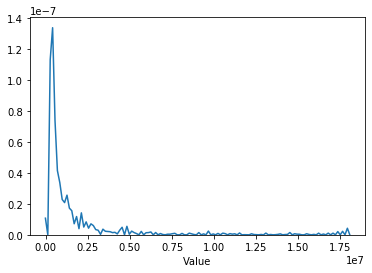

In [31]:
sns.distplot(df_cleansed["GDP"]["Value"], rug=False, hist=False)

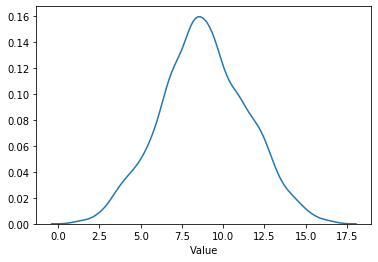

In [32]:
#looks better with log scale
sns.distplot(np.log(df_cleansed["GDP"]["Value"]), rug=False, hist=False)

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one uniformized dataframe `uni_df` with the following columns.

(TO BE CHANGED, WAY MORE COLUMNS)

    Country | Year | GDP | Apples production | Livestock production | Crops importation | Livestock importation | Crops exportation | Livestock exportation
    
In this uniformized dataframe, a tuple `(Country, Year)` uniquely identifies a row.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

In [33]:
food_crop_area_df_pivoted = pd.pivot_table(df_cleansed['Crops Area harvested'], index=["Area Code","Area",'Year'], columns="Item", values="Value")
display(food_crop_area_df_pivoted.sample(10))

,,Item,"Anise, badian, fennel, coriander",Apples,Apricots,Areca nuts,Artichokes,Asparagus,Avocados,Bambara beans,Bananas,Barley,...,Sweet potatoes,"Tangerines, mandarins, clementines, satsumas",Taro (cocoyam),Tomatoes,Tung nuts,"Vegetables&Melons, Total",Vetches,Watermelons,Wheat,Yams
Area Code,Area,Year,,,,,,,,,,,,,,,,,,,,,
27,Bulgaria,1961,1388.0,19685.0,4486.0,NaN,NaN,NaN,NaN,NaN,NaN,304683.0,...,NaN,NaN,NaN,23398.0,NaN,94936.0,57170.0,19490.0,1323010.0,NaN
86,Grenada,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,NaN,...,80.0,NaN,NaN,10.0,NaN,230.0,NaN,NaN,NaN,180.0
69,French Guiana,2008,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,400.0,NaN,...,NaN,81.0,1261.0,126.0,NaN,1046.0,NaN,NaN,NaN,NaN
134,Malta,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.0,...,NaN,NaN,NaN,740.0,NaN,4695.0,932.0,NaN,2069.0,NaN
28,Myanmar,2008,NaN,NaN,NaN,51800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7100.0,NaN,NaN,NaN,NaN,339500.0,NaN,NaN,99733.0,NaN
143,Morocco,1974,20000.0,NaN,NaN,NaN,5800.0,2800.0,125.0,NaN,NaN,1998000.0,...,65.0,NaN,NaN,11800.0,NaN,93366.0,38100.0,7200.0,1917000.0,NaN
86,Grenada,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6202.0,NaN,...,78.0,NaN,NaN,6.0,NaN,234.0,NaN,NaN,NaN,195.0
101,Indonesia,2014,NaN,NaN,NaN,137000.0,NaN,NaN,23981.0,NaN,134070.0,NaN,...,156758.0,NaN,NaN,59008.0,NaN,1076839.0,NaN,35802.0,NaN,NaN
19,Bolivia (Plurinational State of),2009,NaN,501.0,NaN,NaN,NaN,NaN,880.0,NaN,17114.0,55943.0,...,1616.0,16118.0,NaN,5181.0,NaN,91576.0,NaN,1242.0,156670.0,NaN


In [27]:
# Deal with the NaN that appeared

#### 1.F.b. Merging everything  <a name="1Fb"></a>

In [37]:
def rename_columns(x, word):
    if x not in ['Area Code', 'Area', 'Year']:
        return x + ' ' + word
    return x
    
gdp_df = df_cleansed['GDP'].rename(columns = {'Value':'GDP'})
food_area_df = food_crop_area_df_pivoted.rename(columns=lambda x: rename_columns(x, 'harvested area'))

uni_df = pd.merge(gdp_df, food_area_df, how='outer', on=['Area', 'Area Code', 'Year'])

uni_df.sample(30)

,Area Code,Area,Year,GDP,"Anise, badian, fennel, coriander harvested area",Apples harvested area,Apricots harvested area,Areca nuts harvested area,Artichokes harvested area,Asparagus harvested area,...,Sweet potatoes harvested area,"Tangerines, mandarins, clementines, satsumas harvested area",Taro (cocoyam) harvested area,Tomatoes harvested area,Tung nuts harvested area,"Vegetables&Melons, Total harvested area",Vetches harvested area,Watermelons harvested area,Wheat harvested area,Yams harvested area
6077,147,Namibia,1975,1.169340e+03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,400.0,NaN
9510,231,United States of America,2004,1.227493e+07,NaN,155990.0,7017.0,NaN,3040.0,24888.0,...,37555.0,14650.0,150.0,173620.0,NaN,1314836.0,NaN,57340.0,20221956.0,NaN
8610,211,Switzerland,1978,9.906813e+04,NaN,5366.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,290.0,NaN,13773.0,NaN,NaN,88860.0,NaN
12174,220,Trinidad and Tobago,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,467.0,NaN,616.0,345.0,NaN,1091.0,NaN,NaN,NaN,207.0
7705,194,Saudi Arabia,1993,1.327907e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25760.0,NaN,115567.0,NaN,21637.0,764150.0,NaN
8799,154,The former Yugoslav Republic of Macedonia,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470,189,Saint Lucia,1988,3.768028e+02,NaN,NaN,NaN,NaN,NaN,NaN,...,180.0,NaN,57.0,NaN,NaN,125.0,NaN,NaN,NaN,980.0
11544,164,Pacific Islands Trust Territory,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,490.0,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,NaN
8811,154,The former Yugoslav Republic of Macedonia,1995,4.707027e+03,NaN,4518.0,975.0,NaN,NaN,NaN,...,NaN,NaN,NaN,7244.0,NaN,55222.0,4147.0,8805.0,130092.0,NaN
11823,190,Saint Pierre and Miquelon,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Prices of food](#2B)      
                
    3. [Structure of international trade](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Prices of food](#2B), then study the [structure of international trade](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
            1. [Crops](#2Aai)
            
                1. [Production](#2Aai1)
                
                2. [Importation](#2Aai2)
                
                3. [Exportation](#2Aai3)
    
            2. [Livestock](#2Aaii)  
            
                1. [Production](#2Aaii1)
                
                2. [Importation](#2Aaii2)
                
                3. [Exportation](#2Aaii3)
    
            2. [Globally](#2Aaiii)             
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)
            
TODO

#### 2.B. Prices of food  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Prices](#2Ba) 
    
        2. [Stability of prices](#2Bb)      
        
TODO

#### 2.C. Structure of international trade  <a name="2C"></a>

2.  
                
    3. 
    
        1. [One word about historical context](#2Ca) 
    
        2. [Clusters, circularity and openness rates of international trade](#2Cb)   

TODO

#### 2.D. Economic classification of countries <a name="2D"></a>
TODO

### 3. Descriptive data analysis  <a name="3"></a>

3. 

    1. [Production and consumption of food from a time-space geography point of view](#3A)
        
        1. [Net food exporters or importers](#3Aa)
        
        2. [Evolution over the last few decades](#3Ab)

    1. [Food self-sufficiency](#3B)

    2. [Giving countries an economic score based on their agricultural features](#3C)
        
        1. [Correlation between food trade feature and GDP](#3Ca)
        
        2. [Our own score](#3Cb)
        
        2. [Machine learning model](#3Cc)  

    3. [Food prices stability and agricultural features](#3C)  
    
TODO

### 4. Informed plan for next actions  <a name="4"></a>

TODO